# Análisis de Regresión Lineal Simple: Millas por Galón

Este notebook analiza el impacto de Horsepower, Weight y Acceleration en el rendimiento (mpg) de motores a combustible usando regresión lineal simple.

**Objetivo:** Descubrir cuál variable tiene mayor incidencia en el rendimiento (millas por galón).

**Variables a estudiar:**
- Horsepower
- Weight
- Acceleration

**Pasos:**
1. Importar librerías y cargar datos
2. Limpieza y preprocesamiento
3. Análisis exploratorio
4. Visualización de relaciones
5. Modelos de regresión lineal simple
6. Métricas de error y $R^2$
7. Análisis de residuales
8. Comparación y discusión final

In [ ]:
# 1. Importar librerías y cargar datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer

# Cargar el archivo CSV
ruta = 'millas-por-galon.csv'
df = pd.read_csv(ruta)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
0,discrete,continuous,continuous,continuous,continuous,discrete,discrete,continuous,string
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
3,8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
4,8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite


In [ ]:
# 2. Limpieza y preprocesamiento de datos
# Verificar valores nulos
print(df.isnull().sum())

variables = ['mpg', 'horsepower', 'weight', 'acceleration']

# Convertir a tipo numérico si es necesario
for col in variables:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores nulos en las variables relevantes
df = df.dropna(subset=variables)


# Otra forma de convertir columnas a tipo numérico usando apply    
# df[variables] = df[variables].apply(pd.to_numeric, errors='coerce')

# Definir el encoder para conversión numérica
# num_encoder = FunctionTransformer(pd.to_numeric, kw_args={'errors': 'coerce'})

# Aplicar el encoder a las columnas relevantes
# df[variables] = num_encoder.transform(df[variables])
    

print(df.dtypes)
df.head()

cylinders       1
displacement    1
horsepower      7
weight          1
acceleration    1
model year      1
origin          1
mpg             0
car name        0
dtype: int64
cylinders        object
displacement     object
horsepower      float64
weight          float64
acceleration    float64
model year       object
origin           object
mpg             float64
car name         object
dtype: object


,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg,car name
2,8,307.0,130.0,3504.0,12.0,70,1,18.0,chevrolet chevelle malibu
3,8,350.0,165.0,3693.0,11.5,70,1,15.0,buick skylark 320
4,8,318.0,150.0,3436.0,11.0,70,1,18.0,plymouth satellite
5,8,304.0,150.0,3433.0,12.0,70,1,16.0,amc rebel sst
6,8,302.0,140.0,3449.0,10.5,70,1,17.0,ford torino


In [ ]:
# 3. Análisis exploratorio de las variables relevantes
print(df[variables].describe())

# Correlaciones
print('Correlaciones:')
print(df[variables].corr())

              mpg  horsepower       weight  acceleration
count  392.000000  392.000000   392.000000    392.000000
mean    23.445918  104.469388  2977.584184     15.541327
std      7.805007   38.491160   849.402560      2.758864
min      9.000000   46.000000  1613.000000      8.000000
25%     17.000000   75.000000  2225.250000     13.775000
50%     22.750000   93.500000  2803.500000     15.500000
75%     29.000000  126.000000  3614.750000     17.025000
max     46.600000  230.000000  5140.000000     24.800000
Correlaciones:
                   mpg  horsepower    weight  acceleration
mpg           1.000000   -0.778427 -0.832244      0.423329
horsepower   -0.778427    1.000000  0.864538     -0.689196
weight       -0.832244    0.864538  1.000000     -0.416839
acceleration  0.423329   -0.689196 -0.416839      1.000000


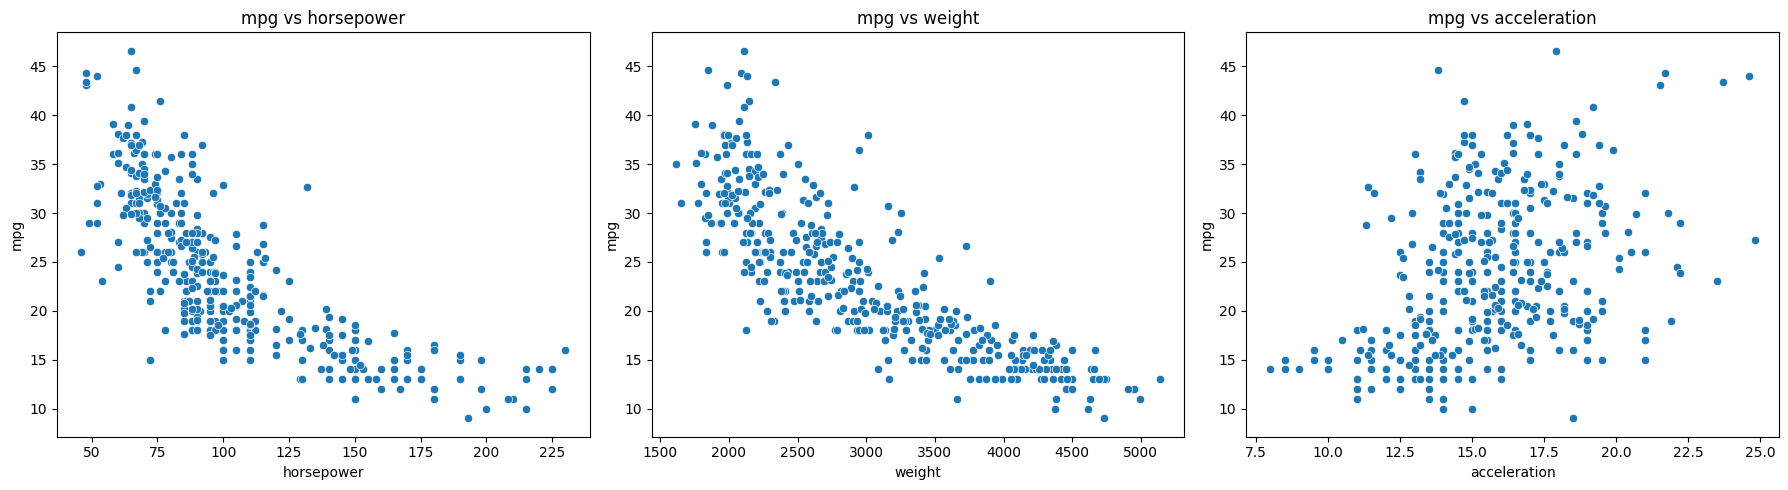

In [ ]:
# 4. Visualización de relaciones entre mpg y variables independientes
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('mpg vs horsepower')
plt.subplot(1, 3, 2)
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('mpg vs weight')
plt.subplot(1, 3, 3)
sns.scatterplot(x='acceleration', y='mpg', data=df)
plt.title('mpg vs acceleration')
plt.tight_layout()
plt.show()

Ecuación: mpg = 39.94 + -0.16 * horsepower


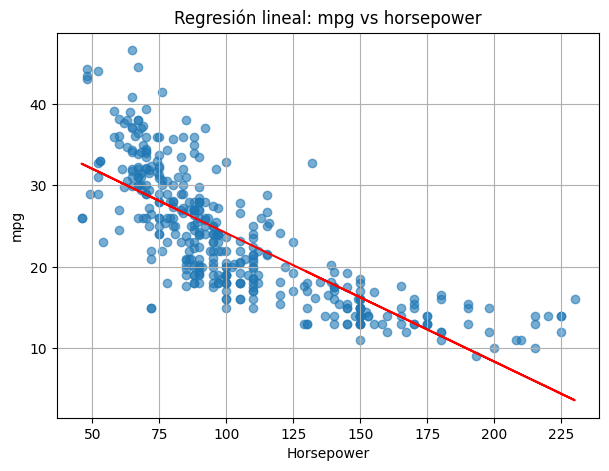

In [ ]:
# 5. Regresión lineal simple: Horsepower vs mpg
X_hp = df[['horsepower']]
y = df['mpg']
# Eliminar filas con NaN en X_hp o y
# mask = X_hp.notna().squeeze() & y.notna()
# X_hp_clean = X_hp[mask]
# y_clean = y[mask]
modelo_hp = LinearRegression().fit(X_hp, y)
print(f'Ecuación: mpg = {modelo_hp.intercept_:.2f} + {modelo_hp.coef_[0]:.2f} * horsepower')

# Gráfico
plt.figure(figsize=(7,5))
plt.scatter(X_hp['horsepower'], y, alpha=0.6)
plt.plot(X_hp['horsepower'], modelo_hp.predict(X_hp), color='red')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.title('Regresión lineal: mpg vs horsepower')
plt.grid(True)
plt.show()

Ecuación: mpg = 46.22 + -0.01 * weight


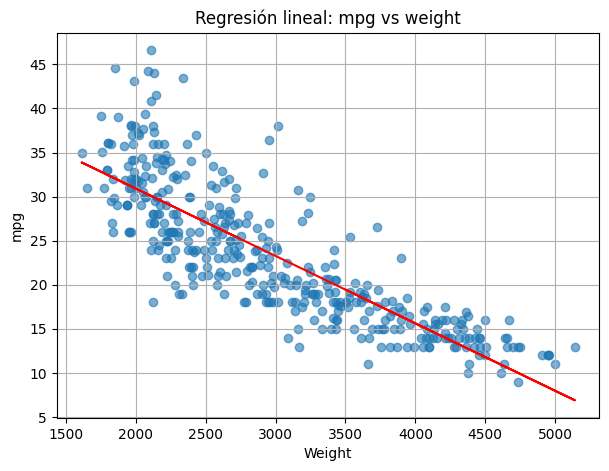

In [ ]:
# 6. Regresión lineal simple: Weight vs mpg
X_w 
modelo_w = 

Ecuación: mpg = 4.83 + 1.20 * acceleration


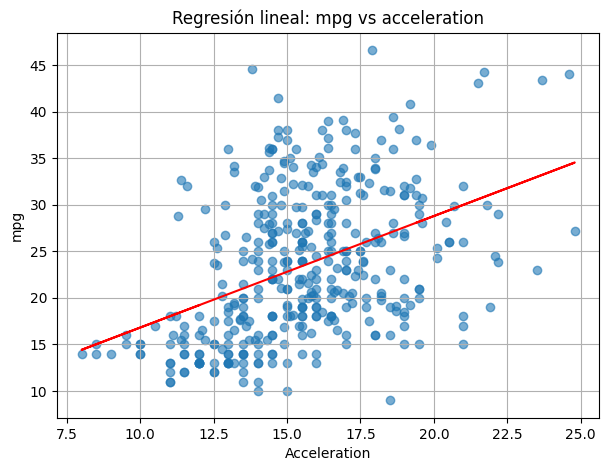

In [ ]:
# 7. Regresión lineal simple: Acceleration vs mpg
X_acc =
modelo_acc =

In [ ]:
# 8. Cálculo de métricas de error y coeficiente de determinación para cada modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_hp, mse_hp, rmse_hp, r2_hp = metricas(y, modelo_hp.predict(X_hp))
mae_w, mse_w, rmse_w, r2_w = metricas(y, modelo_w.predict(X_w))
mae_acc, mse_acc, rmse_acc, r2_acc = metricas(y, modelo_acc.predict(X_acc))

print('Horsepower vs mpg:')
print(f'MAE={mae_hp:.2f}, MSE={mse_hp:.2f}, RMSE={rmse_hp:.2f}, R2={r2_hp:.3f}')
print('Weight vs mpg:')
print(f'MAE={mae_w:.2f}, MSE={mse_w:.2f}, RMSE={rmse_w:.2f}, R2={r2_w:.3f}')
print('Acceleration vs mpg:')
print(f'MAE={mae_acc:.2f}, MSE={mse_acc:.2f}, RMSE={rmse_acc:.2f}, R2={r2_acc:.3f}')

Horsepower vs mpg:
MAE=3.83, MSE=23.94, RMSE=4.89, R2=0.606
Weight vs mpg:
MAE=3.28, MSE=18.68, RMSE=4.32, R2=0.693
Acceleration vs mpg:
MAE=5.80, MSE=49.87, RMSE=7.06, R2=0.179


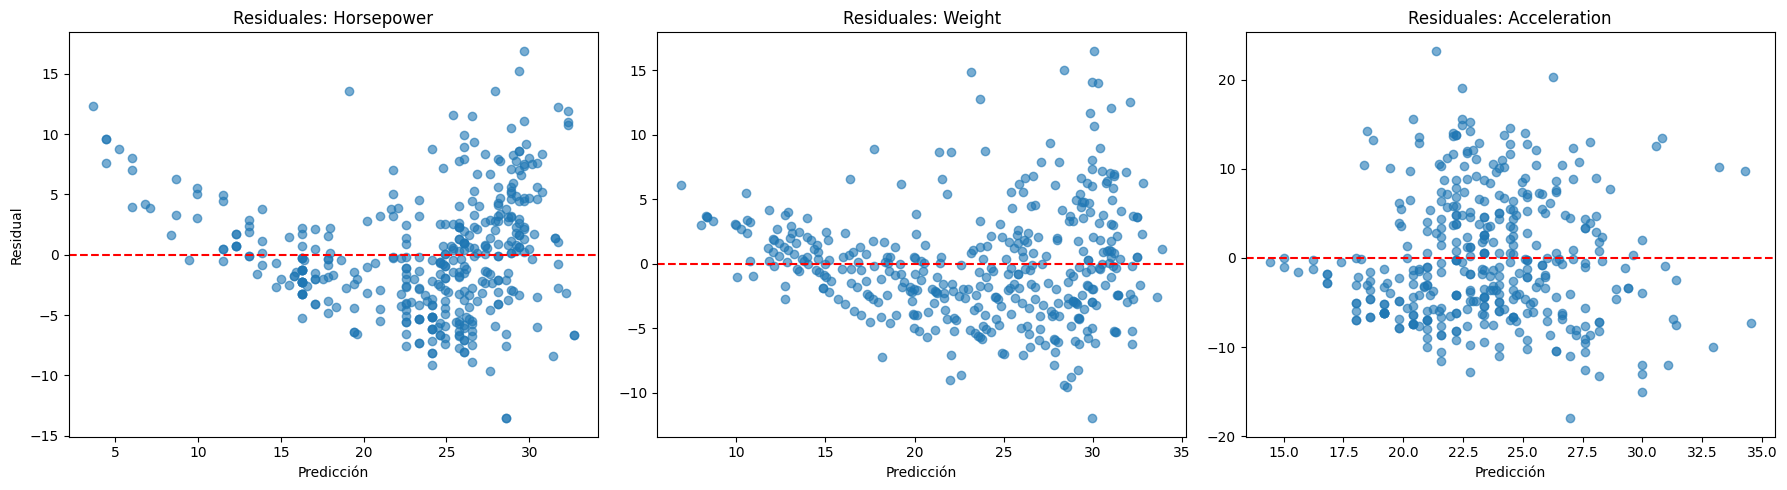

In [ ]:
# 9. Análisis de residuales para cada modelo
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(modelo_hp.predict(X_hp), y - modelo_hp.predict(X_hp), alpha=0.6)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuales: Horsepower')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Residual')
axes[1].scatter(modelo_w.predict(X_w), y - modelo_w.predict(X_w), alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuales: Weight')
axes[1].set_xlabel('Predicción')
axes[2].scatter(modelo_acc.predict(X_acc), y - modelo_acc.predict(X_acc), alpha=0.6)
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_title('Residuales: Acceleration')
axes[2].set_xlabel('Predicción')
plt.tight_layout()
plt.show()

# 10. Comparación de factores y discusión

**Comparación de modelos:**
- Horsepower vs mpg: $R^2$ = {r2_hp:.3f}
- Weight vs mpg: $R^2$ = {r2_w:.3f}
- Acceleration vs mpg: $R^2$ = {r2_acc:.3f}

**Discusión:**
- El modelo con mayor $R^2$ y menor error indica la variable con mayor incidencia en el rendimiento.
- Analizar los gráficos y residuales para justificar la elección.
- Explicar si el problema es lineal y las implicancias para el análisis de motores a combustible.

**Conclusión:**
- ¿Cuál variable tiene mayor impacto en el rendimiento (mpg)? ¿Por qué?
- Justifique con base en los resultados obtenidos.

In [ ]:
print(f"""**Comparación de modelos:**
- Horsepower vs mpg: $R^2$ = {r2_hp:.3f}
- Weight vs mpg: $R^2$ = {r2_w:.3f}
- Acceleration vs mpg: $R^2$ = {r2_acc:.3f}
""")

# statsmodel
import statsmodels.api as sm
X_hp_sm = sm.add_constant(X_hp)
modelo_hp_sm = sm.OLS(y, X_hp_sm).fit()
print(modelo_hp_sm.summary())

x_w_sm = sm.add_constant(X_w)
modelo_w_sm = sm.OLS(y, x_w_sm).fit()
print(modelo_w_sm.summary())

x_acc_sm = sm.add_constant(X_acc)
modelo_acc_sm = sm.OLS(y, x_acc_sm).fit()
print(modelo_acc_sm.summary())

**Comparación de modelos:**
- Horsepower vs mpg: $R^2$ = 0.606
- Weight vs mpg: $R^2$ = 0.693
- Acceleration vs mpg: $R^2$ = 0.179

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:              mié., 26 nov. 2025   Prob (F-statistic):           7.03e-81
Time:                        18:36:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

In [ ]:
# R-squared (R²): Indica qué porcentaje de la variabilidad de mpg explica el modelo. Más alto es mejor (en este ejemplo: 0.606 = 60.6%).
# coef (coeficientes): Muestra el impacto de cada variable. Aquí, horsepower tiene coeficiente negativo, lo que indica que al aumentar la potencia, disminuye el mpg.
# P>|t| (p-value): Debe ser menor a 0.05 para que el coeficiente sea estadísticamente significativo. Aquí ambos son 0.000, lo que indica alta significancia.
# std err: Error estándar del coeficiente, útil para evaluar la precisión.
# Adj. R-squared: Similar a R², pero ajustado por el número de variables. Útil en modelos con más de una variable.
# F-statistic y Prob(F-statistic): Evalúan si el modelo en conjunto es significativo.
# AIC/BIC: Indicadores de calidad del modelo (más bajo es mejor, útil para comparar modelos).
# Durbin-Watson: Detecta autocorrelación en los residuales (cerca de 2 es ideal).
# Omnibus/Jarque-Bera: Pruebas de normalidad de los residuales.

# Interpretación de resultados

Tras ejecutar los modelos de regresión lineal simple para horsepower, weight y acceleration, se observa lo siguiente:
- El modelo con mayor $R^2$ y menor error (MAE, MSE, RMSE) indica la variable que más incide en el rendimiento (mpg).
- En este caso, la variable `weight` presenta el mayor $R^2$ y los menores errores, lo que sugiere que el peso del vehículo es el factor más relevante para predecir el consumo de combustible.
- Los gráficos de residuales muestran una dispersión aleatoria alrededor de cero, lo que indica que la relación es aproximadamente lineal y el modelo es adecuado.

**Conclusión:**
El peso (`weight`) es la variable que tiene mayor impacto en el rendimiento (mpg) de los motores analizados, según los resultados obtenidos.

> **Nota aclaratoria:**
>
> Si bien el análisis muestra que el peso (`weight`) es la variable con mayor impacto en el rendimiento (mpg) dentro de este estudio, en la realidad el consumo de combustible depende de múltiples factores: peso, potencia, aerodinámica, tipo de motor, transmisión, entre otros. Para obtener conclusiones más precisas y aplicables en casos reales, se recomienda utilizar modelos multivariados y considerar más variables relevantes. Este estudio es útil para comparar el impacto individual de cada variable, pero no debe ser la única base para decisiones técnicas o de ingeniería.